In [1]:
import pandas as pd

In [9]:
fruits = pd.read_csv("../Data/fruits.csv")

fruits.head()


,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [4]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruits는 35개의 사과와 14개의 딸기로 구성되어 있음

### apple의 분석 적합 여부 판단

In [19]:
# 사과 정보 불러오기
# apple = fruits.iloc[:34+1,:]
# apple = fruits[:34+1]
apple = fruits[fruits.name == 'apple']

# 사과 정보 출력
apple.tail()



,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


### 산포도로 확인하기

In [20]:
import matplotlib.pyplot as plt


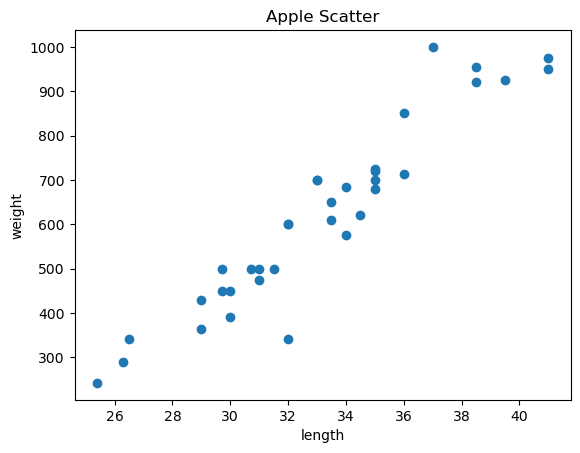

In [25]:
plt.scatter(
    apple.length,
    apple.weight,
)

plt.xlabel('length')
plt.ylabel('weight')
plt.title('Apple Scatter')

plt.show()


> length와 weight의 분포가 정규 분포를 띄고 있음

### berry의 분석 적합 여부 판단

In [26]:
berry = fruits[fruits.name == 'berry']

berry


,length,weight,name
35,9.8,6.7,berry
36,10.5,7.5,berry
37,10.6,7.0,berry
38,11.0,9.7,berry
39,11.2,9.8,berry
40,11.3,8.7,berry
41,11.8,10.0,berry
42,11.8,9.9,berry
43,12.0,9.8,berry
44,12.2,12.2,berry


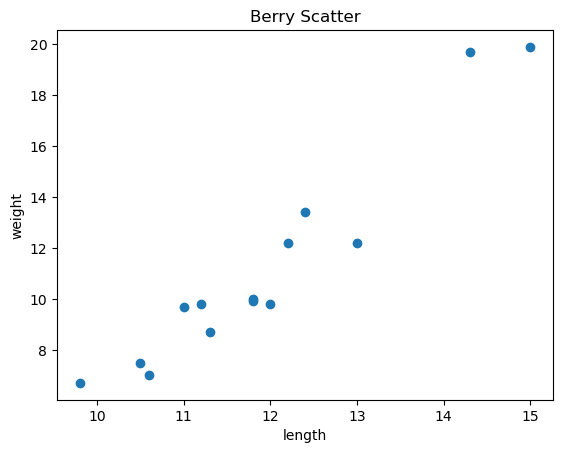

In [27]:
plt.scatter(
    berry.length,
    berry.weight,
)

plt.xlabel('length')
plt.ylabel('weight')
plt.title('Berry Scatter')

plt.show()

> berry도 정규 분포 그래프를 구성하고 있음



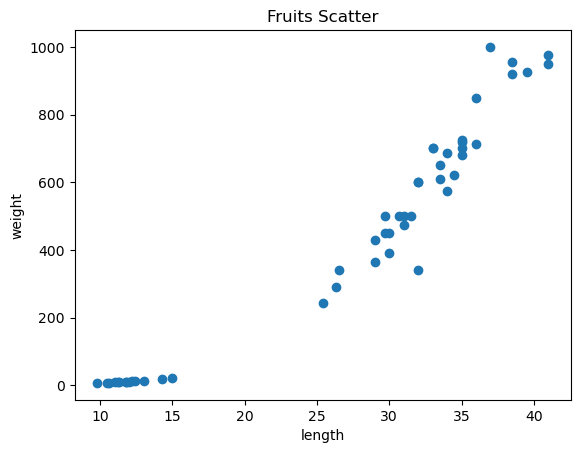

In [29]:
# fruits의 산포도
plt.scatter(
    fruits.length,
    fruits.weight,
)

plt.xlabel('length')
plt.ylabel('weight')
plt.title('Fruits Scatter')

plt.show()


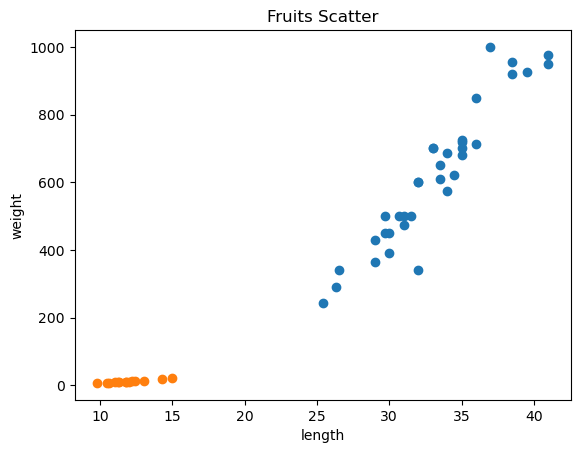

In [32]:
# fruits의 산포도
plt.scatter(
    apple.length,
    apple.weight,
)

plt.scatter(
    berry.length,
    berry.weight,
)

plt.xlabel('length')
plt.ylabel('weight')
plt.title('Fruits Scatter')

plt.show()


---
### 머신러닝을 위한 데이터 준비

- Feature Data와 Target Data 분리

In [43]:
# Feature Data
# fruitsData = fruits[['length','weight']]
fruitsColumns = ['length','weight']
fruitsData = fruits[fruitsColumns]

fruitsData.head()


,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [44]:
fruitsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [46]:
# Target Data
fruitsTarget = fruits['name']

fruitsTarget.head()


0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

In [47]:
fruitsTarget.info()


<class 'pandas.core.series.Series'>
RangeIndex: 49 entries, 0 to 48
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
49 non-null     object
dtypes: object(1)
memory usage: 524.0+ bytes


---
### 최근접 이웃(kNN : k-Nearest Neighbor) 분류 알고리즘 사용


- k 값은 내 주위에 몇 개의 이웃을 찾을 것인지를 결정하는 값
- k 값은 홀수로 설정하는 것이 일반적

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# 모델 생성
kn = KNeighborsClassifier() # 기본값은 n_neighbors=5

In [51]:
# 모델 학습
kn.fit(fruitsData, fruitsTarget)

KNeighborsClassifier()

In [54]:
# 정확도
kn.score(fruitsData, fruitsTarget)  # True / False 값을 반환
# 1.0을 반환하는 이유: 모델이 완벽하게 학습되었기 때문

1.0

### 예측해 보기

In [58]:
import warnings
warnings.filterwarnings('ignore')   # 경고 메시지 무시

In [60]:
# 길이가 30cm이고 무게가 600g인 과일은 무엇인가?
kn.predict([[30,600]])[0]  # 2차원 데이터는 2차원 배열로 입력


'apple'

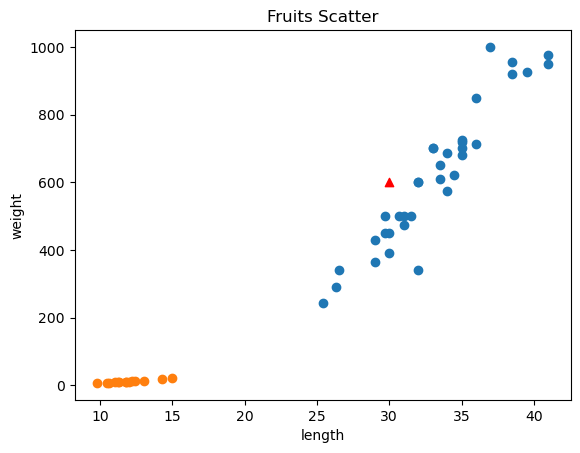

In [71]:
# 산포도로 예측 범위 확인하기

plt.scatter(
    apple.length,
    apple.weight,
)

plt.scatter(
    berry.length,
    berry.weight,
)

plt.scatter(
    30,
    600,
    c='red',
    marker='^'
)

plt.xlabel('length')
plt.ylabel('weight')
plt.title('Fruits Scatter')

plt.show()
